# SigR
    1 contaminant
    180924 field
    1-P_chance prior
    sigR to 0.75"

In [2]:
%matplotlib notebook

In [1]:
# imports
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from astropy.table import Table
from astropy import units
from astropy.coordinates import SkyCoord

from frb.associate import bayesian
from frb.galaxies import hosts

# Load

In [4]:
sky = Table.read('tst_DES_180924.fits')
frbs = Table.read('tst_FRB_180924_faint_sigR0.75.fits')

# Model

In [5]:
sigR = 0.75 * units.arcsec
theta_u = dict(method='uniform', max=4.) # This is 2x larger than truth
fov = 6 * units.arcsec
ncontam = 1

# Run

In [6]:
model_dict = bayesian.mock_run(sky, frbs, sigR, theta_u, fov, ncontam=ncontam)

Working on FRB: 0000
Working on FRB: 0010
Working on FRB: 0020
Working on FRB: 0030
Working on FRB: 0040
Working on FRB: 0050
Working on FRB: 0060
Working on FRB: 0070
Working on FRB: 0080
Working on FRB: 0090


# Explore

## Parse

In [7]:
model_mags, model_theta, max_PMix = bayesian.parse_model(model_dict)

## Magnitudes

In [8]:
bins_mag = np.linspace(19., 25.5, 20)

<IPython.core.display.Javascript object>


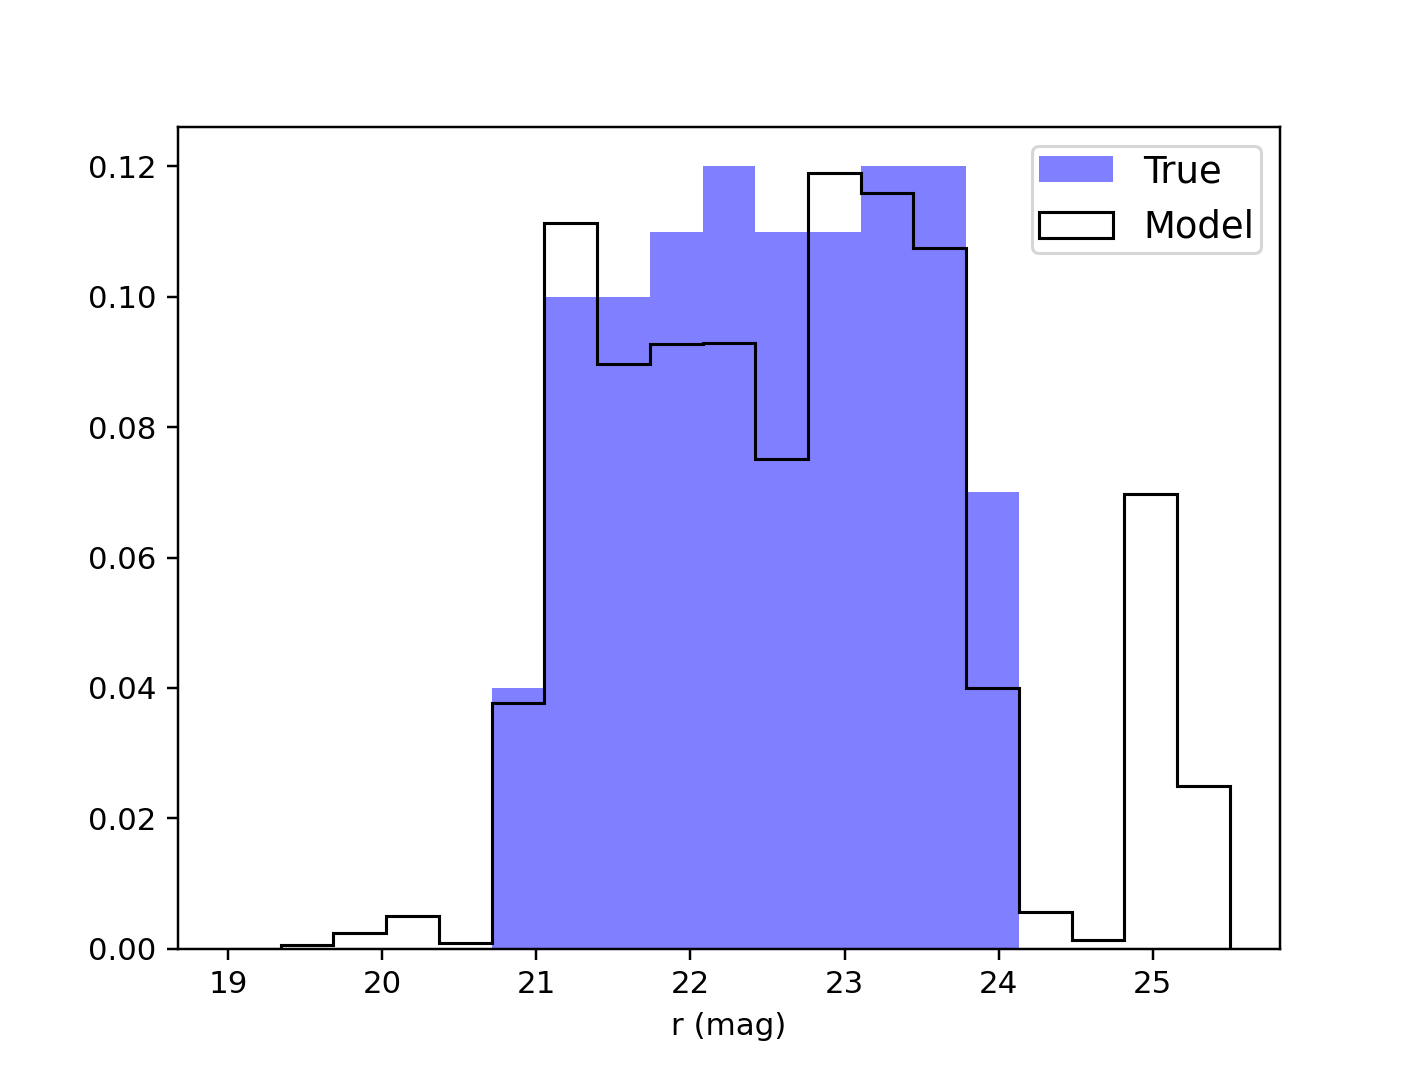

In [9]:
plt.clf()
ax = plt.gca()
# True
weights = np.ones_like(frbs['DES_r'].data)/float(len(frbs))
ax.hist(frbs['DES_r'], weights=weights, bins=bins_mag, color='b', label='True', alpha=0.5)
# Recovered
weights2 = np.ones_like(model_mags)/model_mags.size
ax.hist(model_mags, weights=weights2, bins=bins_mag, color='k', label='Model', histtype='step')
#
ax.set_xlabel('r (mag)')
legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       fontsize='large')
#
plt.show()

## Theta

In [10]:
bins_theta = np.linspace(0., 5., 20)

<IPython.core.display.Javascript object>


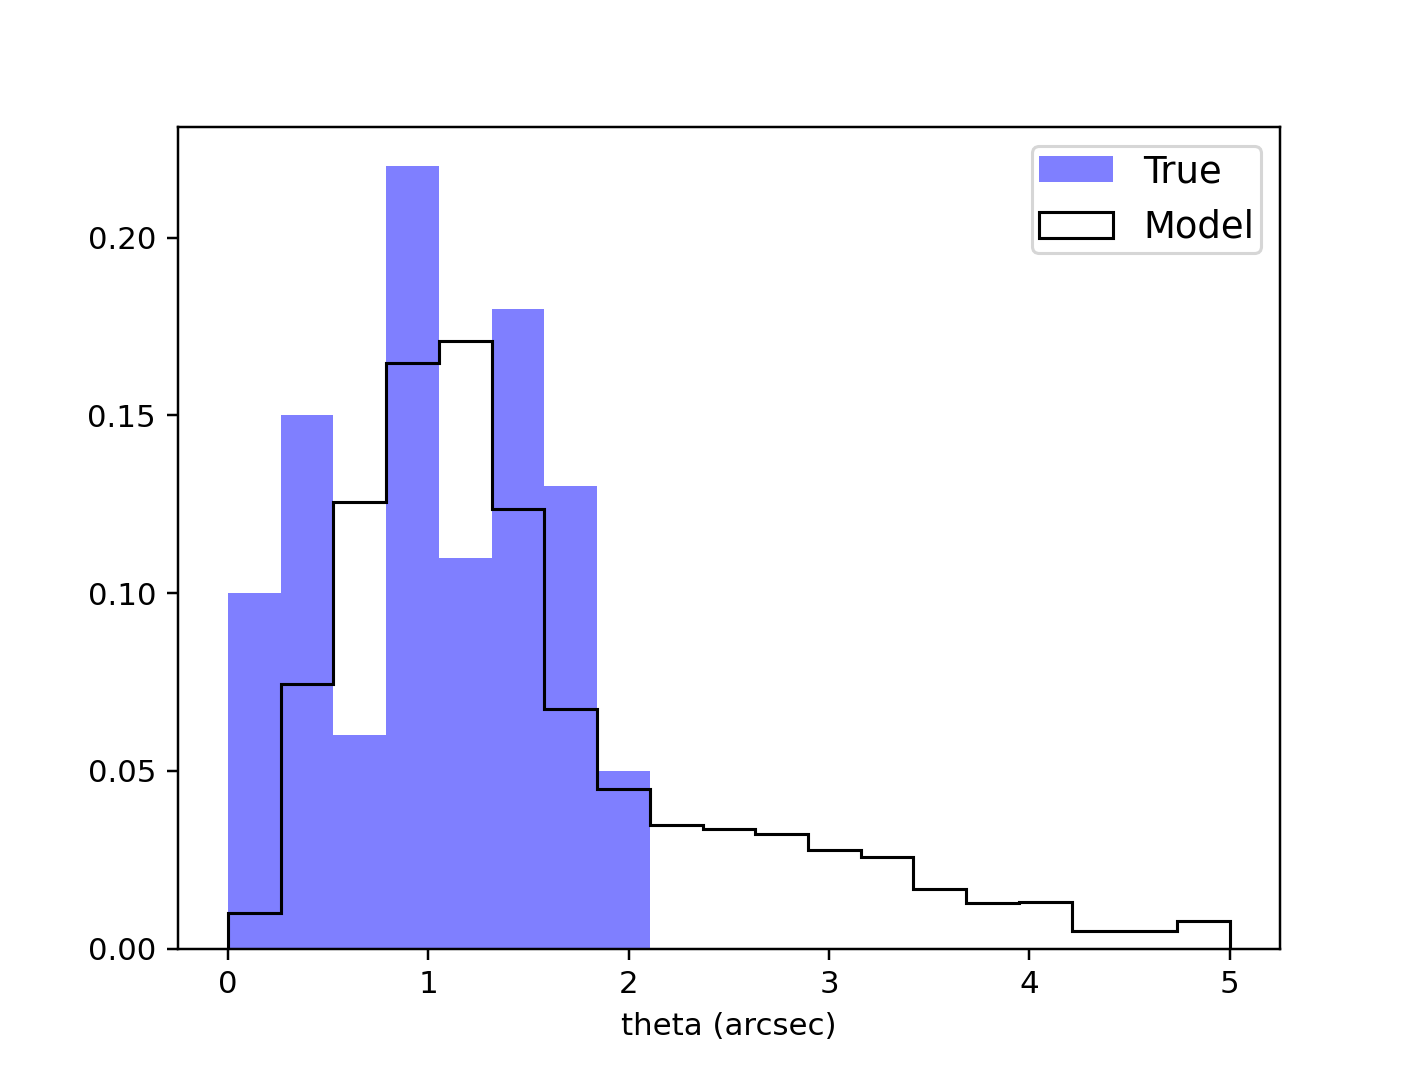

In [11]:
plt.clf()
ax = plt.gca()
# True
weights1 = np.ones_like(frbs['theta'].data)/float(len(frbs))
ax.hist(frbs['theta'], weights=weights1, bins=bins_theta, color='b', label='True', alpha=0.5)
# Recovered
weights2 = np.ones_like(model_theta)/model_theta.size
ax.hist(model_theta, weights=weights2, bins=bins_theta, color='k', label='Model', histtype='step')
#
ax.set_xlabel('theta (arcsec)')
legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       fontsize='large')
#
plt.show()

## Max $P(M_i|x)$

In [12]:
bins_PMi = np.linspace(0., 1., 25)

<IPython.core.display.Javascript object>


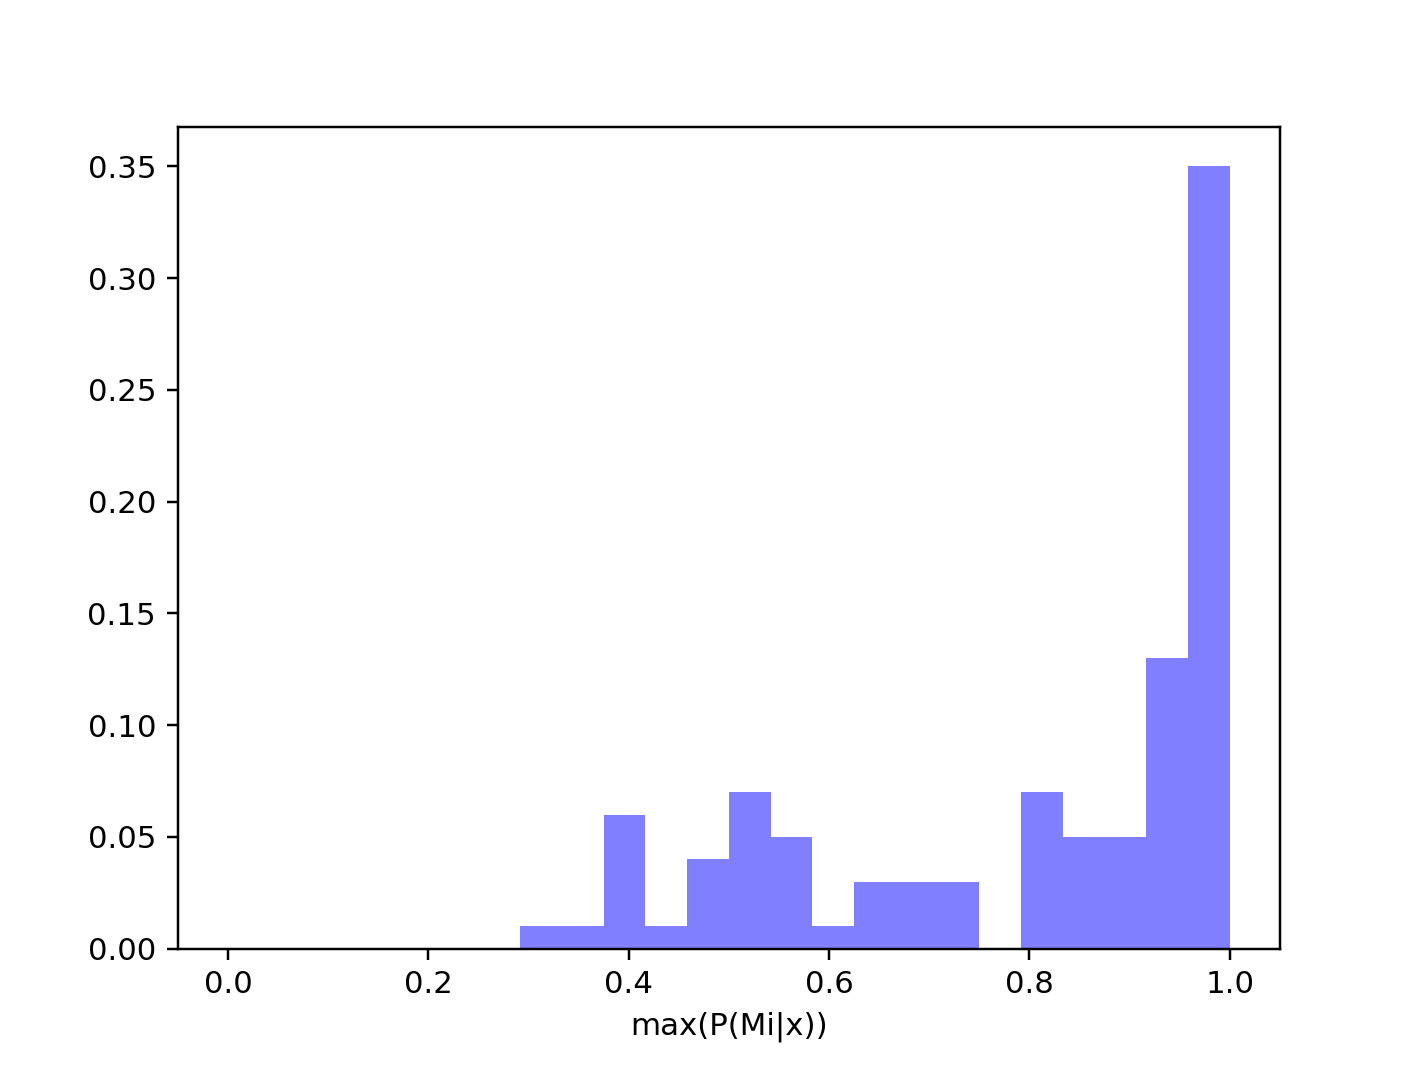

In [13]:
plt.clf()
ax = plt.gca()
# True
weights1 = np.ones_like(max_PMix.data)/max_PMix.size
ax.hist(max_PMix, weights=weights1, bins=bins_PMi, color='b', alpha=0.5)
#
ax.set_xlabel('max(P(Mi|x))')
#ax.set_xlim(0., 1.1)
#legend = ax.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
#                       fontsize='large')
#
plt.show()